**Author: Rishith Sunil**

For Course: "Computing in Sciences-II"

A 1-d function $f(x)$ which is peroidic (with period $L$, hence $f(x)=f(x+L)$)  can be written as $$ f(x)= \sum_{n=0}^{n=\infty} a_n \cos \left( 2\pi n \frac{x}{L} \right) + b_n \sin (\left( 2\pi n \frac{x}{L}\right)$$



** TASK-1: **

For a square pulse, find the Fourier coefficients $a_n$ and $b_n$ for $n<N$.
Choose different values of $N$ and see how this cutoff $N$ works!


5-term Fourier coefficients:
a_n: [1.0, -0.6366197723675815, 4.9960867170053485e-17, 0.2122065907891938, -2.7755575615628914e-17]
b_n: [0.0, 3.5255159678371044e-17, -9.418406034363856e-17, 2.7336144958539605e-17, -1.5046614465406924e-16]
10-term Fourier coefficients:
a_n: [1.0, -0.6366197723675815, 4.9960867170053485e-17, 0.2122065907891938, -2.7755575615628914e-17, -0.12732395447351638, -9.822139246202428e-17, 0.09094568176679738, -4.2327252813834093e-16, -0.07073553026306437]
b_n: [0.0, 3.5255159678371044e-17, -9.418406034363856e-17, 2.7336144958539605e-17, -1.5046614465406924e-16, 3.0482307889527384e-16, 1.86743920009353e-16, -1.1023478411452434e-16, 1.9472849898571744e-16, 1.421898624962227e-16]
50-term Fourier coefficients:
a_n: [1.0, -0.6366197723675815, 4.9960867170053485e-17, 0.2122065907891938, -2.7755575615628914e-17, -0.12732395447351638, -9.822139246202428e-17, 0.09094568176679738, -4.2327252813834093e-16, -0.07073553026306437, -3.205913081016718e-16, 0.05787452476068935, -

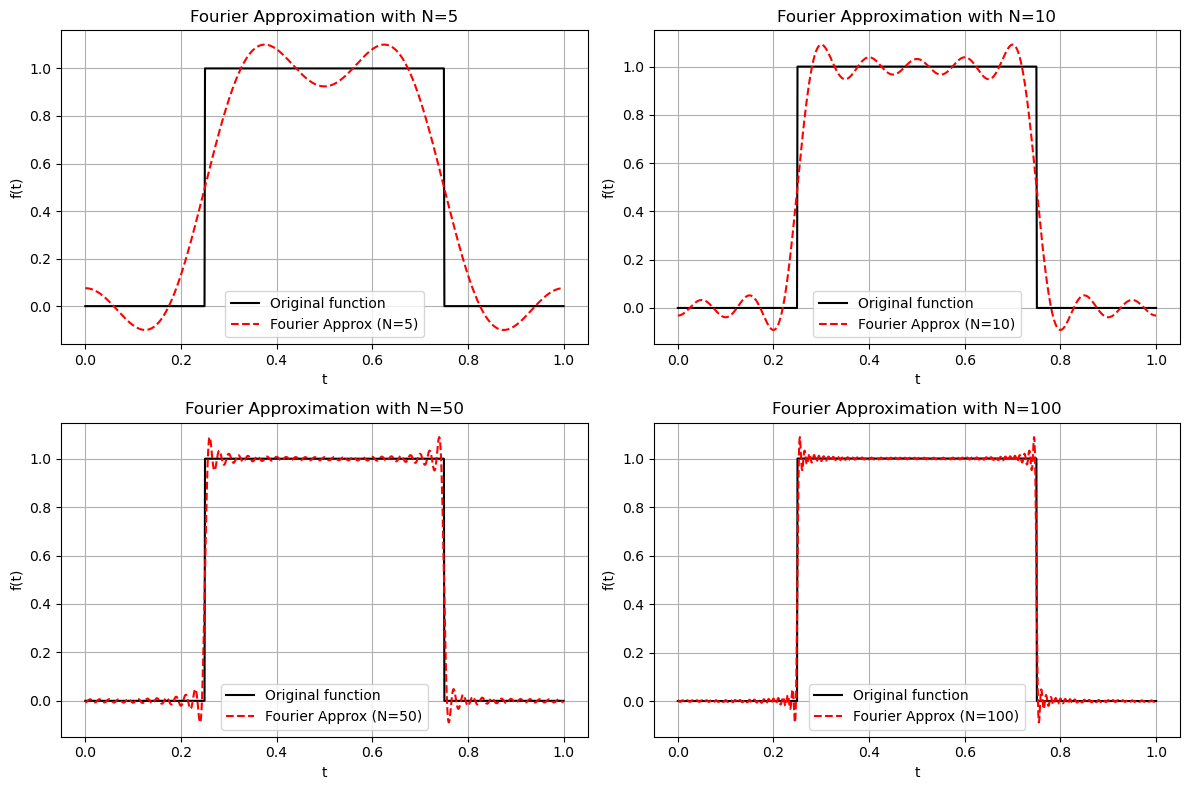

In [44]:
import math
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

def square(x, l):
    return np.where((1/4 <= np.mod(x, l)) & (np.mod(x, l) <= 3/4), 1, 0)

def cos_f(x, n, l):
    return np.cos((n * 2 * np.pi * x) / l)

def sin_f(x, n, l):
    return np.sin((n * 2 * np.pi * x) / l)

def compute_fourier_coefficients(N, T=1):
    a_n_vals = []
    b_n_vals = []

    for n in range(N):
        a = integrate.quad(lambda x: square(x, T) * cos_f(x, n, T), 0, T)[0]
        b = integrate.quad(lambda x: square(x, T) * sin_f(x, n, T), 0, T)[0]

        a *= 2 / T
        b *= 2 / T

        a_n_vals.append(a)
        b_n_vals.append(b)

    print(f"{N}-term Fourier coefficients:")
    print(f"a_n: {a_n_vals}")
    print(f"b_n: {b_n_vals}")
    return a_n_vals, b_n_vals

def fourier_series_approx(x, a_vals, b_vals, T):
    approx = np.full_like(x, a_vals[0] / 2)  # a_0 / 2 term

    for n in range(1, len(a_vals)):  
        approx += a_vals[n] * cos_f(x, n, T) + b_vals[n] * sin_f(x, n, T)

    return approx

def fourier(func):
    T = 1  # Period
    N_values = [5, 10, 50, 100]  # Different cutoffs for Fourier series
    t = np.linspace(0, T, 1000)

    plt.figure(figsize=(12, 8))

    for i, N in enumerate(N_values, 1):
        a_vals, b_vals = compute_fourier_coefficients(N, T)
        approx = fourier_series_approx(t, a_vals, b_vals, T)
        true_function = square(t, T)  # Using square function instead of non-existent square_pulse

        plt.subplot(2, 2, i)
        plt.plot(t, true_function, 'k', label="Original function")
        plt.plot(t, approx, 'r', linestyle='dashed', label=f"Fourier Approx (N={N})")
        plt.xlabel("t")
        plt.ylabel("f(t)")
        plt.title(f"Fourier Approximation with N={N}")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

fourier(square)

    


C:\Users\Rishith Sunil\AppData\Local\Temp\ipykernel_10332\1680029753.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a_n, _ = integrate.quad(lambda t: square_pulse(t, T) * cos_term(t, n, T), 0, T)
C:\Users\Rishith Sunil\AppData\Local\Temp\ipykernel_10332\1680029753.py:22: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  a_n, _ = integrate.quad(lambda t: square_pulse(t, T) * cos_term(t, n, T), 0, T)


ValueError: num must be an integer with 1 <= num <= 4, not 5

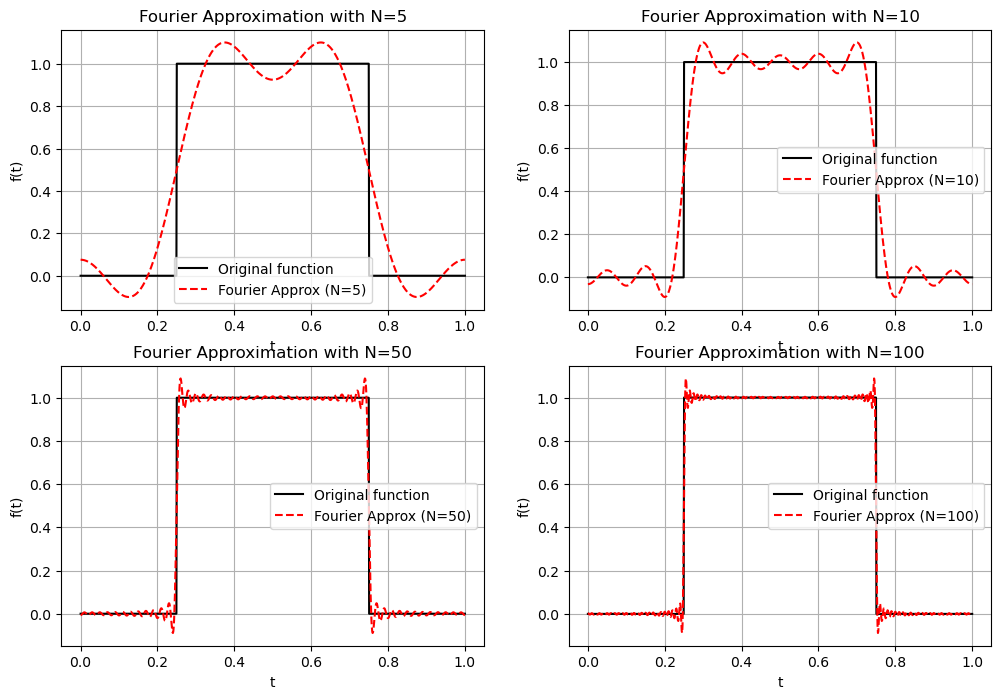

In [38]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Define the square pulse function
def square_pulse(t, T):
    return np.where((T/4 <= t % T) & (t % T <= 3*T/4), 1, 0)

# Define cosine and sine basis functions
def cos_term(t, n, T):
    return np.cos((2 * np.pi * n * t) / T)

def sin_term(t, n, T):
    return np.sin((2 * np.pi * n * t) / T)

# Compute Fourier coefficients up to N terms
def compute_fourier_coefficients(N, T=1):
    a_n_vals = []
    b_n_vals = []
    
    for n in range(N):
        a_n, _ = integrate.quad(lambda t: square_pulse(t, T) * cos_term(t, n, T), 0, T)
        b_n, _ = integrate.quad(lambda t: square_pulse(t, T) * sin_term(t, n, T), 0, T)
        
        a_n*=2/T
        b_n*=2/T
        
        a_n_vals.append(a_n)
        b_n_vals.append(b_n)

    return a_n_vals, b_n_vals

# Approximate the function using Fourier series


# Define parameters
T = 1  # Period
N_values = [5, 10, 50,100,500]  # Different cutoffs for Fourier series
t = np.linspace(0, T, 1000)  # Time vector

# Plot results
plt.figure(figsize=(12, 8))

for i, N in enumerate(N_values, 1):
    a_vals, b_vals = compute_fourier_coefficients(N, T)
    approx = fourier_series_approx(t, a_vals, b_vals, T)
    true_function = square_pulse(t, T)

    plt.subplot(2, 2, i)
    plt.plot(t, true_function, 'k', label="Original function")
    plt.plot(t, approx, 'r', linestyle='dashed', label=f"Fourier Approx (N={N})")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.title(f"Fourier Approximation with N={N}")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


***
<a id='lesson-9'></a>
# Epicycle: a circle rolling over another circle
***

Circle moving on other circle is a frequent motif in the models of planetary model.  For example, imagine descirbing the motion of moon; in a helio-centric model, moon circles earth while the earth circles around the sun.

Fourier showed that ANY curve can be described as a motion of a circle which is moving on another circle, which is moving on another circle and so on. In this lesson, we will explore the Fourier analysis using complex numbers.

We want to model a closed curve in two dimensions; as a simplistic example, consider a circle with center at origin given by $x^2 + y^2 = c^2$, with $c$ being the radius of the circle. Of specific interest is the parametric description with parameter $t$, the circle has following parametric description: $x(t) = c \cos(t)$ and $y(t) = c \sin(t)$. The complex number description of this parametrization is given by $z(t) = c \exp(j t)$ where $j= \sqrt{-1}$.

Let us consider:  $z(t) = c e^{jt}$, this has $z(t) = z(t+ 2 \pi)$, i.e. with a period of $2\pi$ any point returns to itself.

Now consider: $z(t) = c e^{njt}$, this has $z(t) = z(t + 2\pi/n)$, i.e. with a period of $2\pi/n$ evey point returns to itself.

For the sake of having a period 1 unit of time and fractions of it, we will consider $z(t) = c e^{2\pi n j t}$, which has a period of 1/n unit of time.


In [54]:
import cmath

In [1]:
%pylab inline
# if above line is used there is no need to import cmath because numpy already includes cmath!

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


See python documentation for `cmath` at https://docs.python.org/3.5/library/cmath.html

In [29]:
# circle
tvals = linspace(0,1,201)[1:] # remove 0 from the array, and 1001 instead of 1000!
zvals_circle = np.exp(2j*pi*tvals)

In [30]:
tvals[:10]

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])

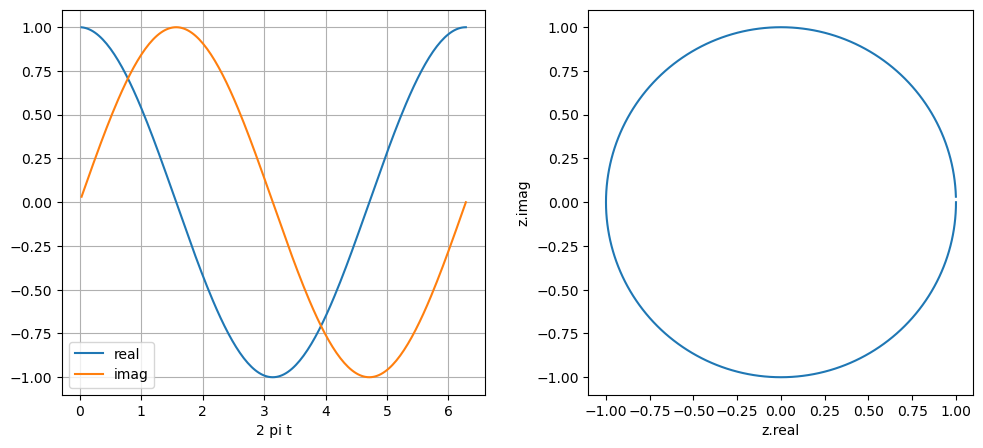

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5)) # 12 inches by 5 inches

plt.subplot(1,2,1)
plt.plot(tvals*2*pi,zvals_circle.real,label='real')
plt.plot(tvals*2*pi,zvals_circle.imag,label='imag')
plt.xlabel('2 pi t')
plt.grid()
plt.legend()
#axis('scaled')

plt.subplot(1,2,2)
plt.plot(zvals_circle.real,zvals_circle.imag)
plt.xlabel('z.real')
plt.ylabel('z.imag')
plt.axis('scaled')
plt.show()

Note the small gap in the circle (right figure above). This is by construction, via tvals!

Consider an epicycle given by: $z(t) = c_1 e^{2\pi jt} + c_2 e^{30*2\pi jt}$

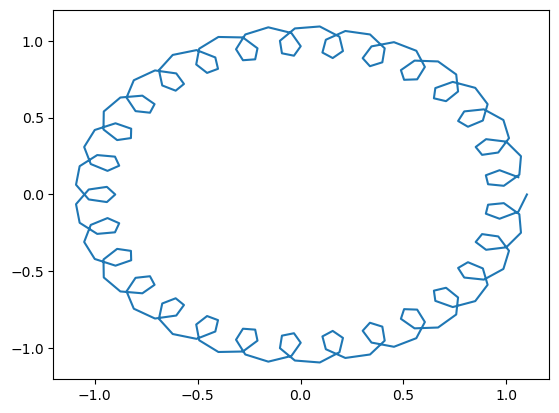

In [14]:
zvals_1_30 = np.exp(tvals*2j*pi) + 0.1*np.exp(30*tvals*2j*pi)
plot(zvals_1_30.real,zvals_1_30.imag)
show()

Above curve become more smoother as number of points (here 201) is increased!

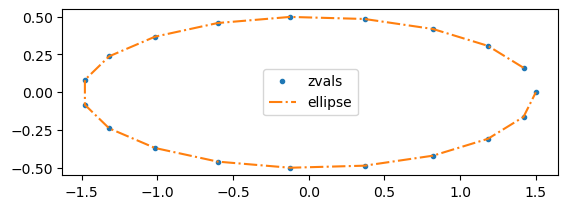

In [15]:
tvals = linspace(0,1,20)[1:] # slicing to remove 0
zvals_2 = np.exp(tvals*2j*pi) + 0.5*np.exp(-tvals*2j*pi)
plot(zvals_2.real, zvals_2.imag,'.',label='zvals')
plot(1.5*np.cos(tvals*2*pi),0.5*np.sin(tvals*2*pi),'-.',label='ellipse')
axis('scaled')
legend()
show()

Notice the gap, due to tvals.

Consider that there are a series of observations $\vec{r}_i= (x_i,y_i),\, i\in[1,N]$. We will form the closed curve by $\vec{r}_{N+i} = \vec{r}_i$. We want to find a epicyclic desription of the complex function $z(t)$ such that for $t_i=\tau*i$, we have $z(t_i)=(x_i,y_i)$.  That is, we want to find a description
$$  z(t) = \sum_n c_n * e^{2 \pi j~n~t} \tag{eq:1}
$$
where the coefficient $c_n$ can be a complex number, and $n \in \mathcal{Z}$; later we will show that
$\tau = \frac{1}{N}$.

Lets try formulate the problem. Given $z_i \forall i \in [1,N]$, with $z_i \equiv z(t_i)$, find $c_n$ in the Equation eq:1 above.

Solution: Consider $$z(t)*e^{- 2\pi j m t} = \sum_n c_n * e^{2 \pi j~(n-m)~t}$$
then integrating on both sides from $t=0$ $t=1$, gives us
$$ \int_0^1 dt~z(t)*e^{- 2\pi j m t} = c_m \implies c_m = \tau \sum_{i=1}^{N} z_i*e^{-2\pi j m~i \tau}
$$
Typically $c_n$ is found for $|n| \le n_{max}$ i.e. $n \in [-n_{max}, \cdots, 0 , \cdots, -n_{max}]$

In [58]:
# TASK-2:  Write the following functions to compute coeffiencents

def determine_coffecients(zvals,nmax):
    '''find the coefficients from -nmax to nmax, i.e. 2*nmax+1 coefficients'''
    N = len(zvals)
    coefficients = {}

    for m in range(-nmax, nmax + 1):
        cm = 0  
        for i in range(N):  
            cm += zvals[i] * np.exp(-2j * np.pi * m * i * (1/N))  
        cm *= (1/N)  
        coefficients[m] = cm

    return coefficients



In [59]:
# TASK-3: Write a function that takes in the fourier coefficients and plots the curve
def plot_epicycles(fourier_dict, numPoints):
    '''use the fourier coefficients and get the curve having numPoints points'''
    t_vals = np.linspace(0, 1, numPoints) 
    z_vals = np.zeros(numPoints, dtype=complex)  
    
    for n, c_n in fourier_dict.items():
        z_vals += c_n * np.exp(2j * np.pi * n * t_vals) 
    
    
    x_vals = z_vals.real
    y_vals = z_vals.imag


    plt.figure(figsize=(6,6))
    plt.plot(x_vals, y_vals, 'b', linewidth=2)
    plt.xlabel("Real part")
    plt.ylabel("Imaginary part")
    plt.title("Reconstructed Curve from Fourier Coefficients")
    plt.axis('equal')  
    plt.grid(True)
    plt.show()

    return z_vals


Lets try on the following example: `curve_para-1-v2.dat`

In [60]:
curve2= numpy.loadtxt(r"C:\Users\Rishith Sunil\Desktop\curve_para-1-v2.dat")

BELOW ARE THE (X,Y) pair (one per line) for a closed curve stored in the file: "curve_para-1_v2.dat"

121.49305 24.870832

107.49556 28.132284

100.09688 36.593452

102.59857 45.19524

118.11889 49.939392

127.84305 50.976391

133.17926 55.077209

133.3734 65.122757

120.6111 70.555557

107.85551 73.181053

100.23964 79.049072

103.67777 88.194443

116.85825 93.379539

124.66315 94.171944

121.51106 105.78836

115.76173 112.59842

106.22371 109.85727

102.96416 100.91142

111.91701 94.309814

126.43134 88.897537

133.66388 81.315277

129.43056 70.379166

120.96388 66.851387

113.90132 60.350796

118.67082 51.858334

137.76537 49.918056

154.39876 47.793934

161.08369 39.599545

154.65416 31.397223

144.56799 24.620348

133.48749 22.048611

122.02221 21.872223

121.95285 22.265259

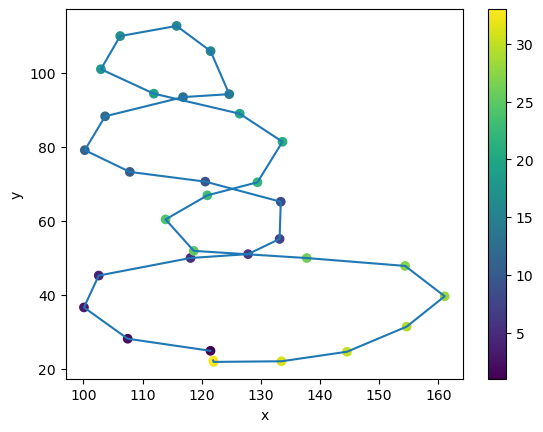

In [61]:
plot(curve2[:,0],curve2[:,1],'-',label='orig')
scatter(curve2[:,0],curve2[:,1],c=list(range(1,shape(curve2)[0]+1)))

xlabel('x')
ylabel('y')
colorbar()
show()

In [62]:
curve2_zvals = curve2[:,0]+1j*curve2[:,1]

In [63]:
curve2_fourier_dict = determine_coffecients(curve2_zvals, 5)

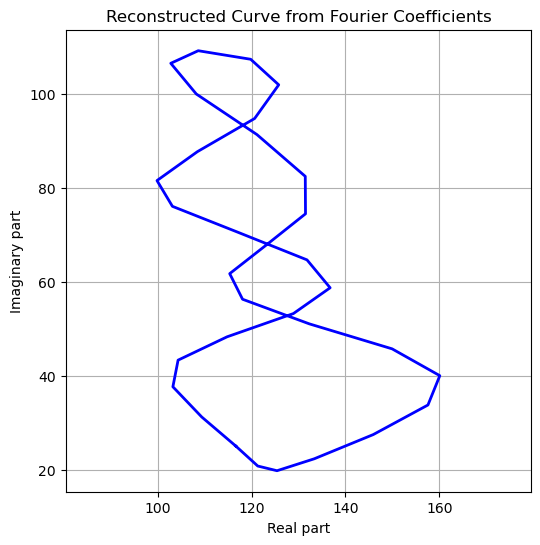

In [64]:
curve2_reconstructed = plot_epicycles(curve2_fourier_dict, 33)

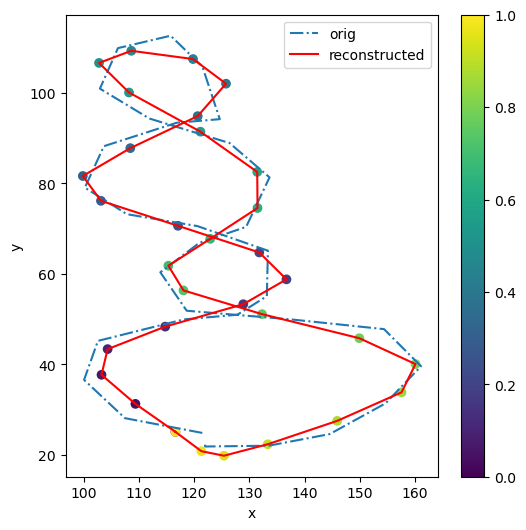

In [65]:
plt.figure(figsize=(6,6))
plt.plot(curve2[:,0],curve2[:,1],'-.',label='orig')
plt.plot(curve2_reconstructed.real, curve2_reconstructed.imag,'r-',label='reconstructed')
plt.xlabel('x'); ylabel('y')
plt.legend()
plt.scatter(curve2_reconstructed.real, curve2_reconstructed.imag,c=linspace(0,1,shape(curve2_reconstructed)[0]))

plt.colorbar()
plt.show()

Another intersting example is below:

In [66]:
fig_pi = numpy.loadtxt(r"C:\Users\Rishith Sunil\Desktop\pi-3.dat")

BELOW are the (X,Y) pairs for the points stored in "pi-3.dat"

60.854166 -143.54167

62.706249 -115.49583

60.589583 -100.15

58.208333 -89.302084

51.954042 -89.83125

35.532988 -89.566667

30.427083 -86.391667

30.261577 -64.966797

40.11226 -70.58208

55.84397 -72.897917

65.65044 -72.104167

76.717289 -67.371466

88.825979 -63.442558

103.02191 -60.819743

121.70833 -59.668751

134.67291 -60.462501

137.2045 -74.350308

131.7652 -78.686125

123.03125 -77.660417

112.11589 -80.302739

107.21489 -84.372719

113.21033 -103.64871

114.95576 -119.33255

114.97706 -137.08417

109.49854 -143.2698

98.40901 -143.8321

96.897487 -129.76806

94.783267 -113.11451

91.250826 -97.895848

89.429156 -88.24375

77.500933 -90.72854

78.746064 -102.79205

79.604333 -115.7488

80.490043 -131.53452

81.227072 -148.56875

74.263468 -146.1875

64.293739 -145.92292

63.029539 -145.0477



In [67]:
zvals_pi = fig_pi[:,0]+1j*fig_pi[:,1]

In [68]:
pi_fourier_dict = determine_coffecients(zvals_pi, 10)

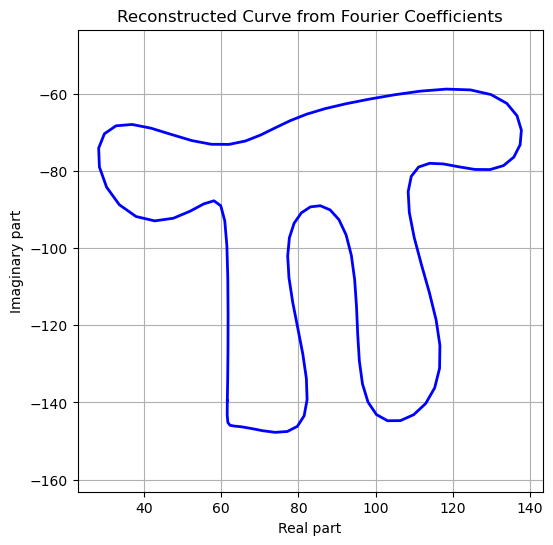

In [69]:
reconstructed_pi = plot_epicycles(pi_fourier_dict,100)

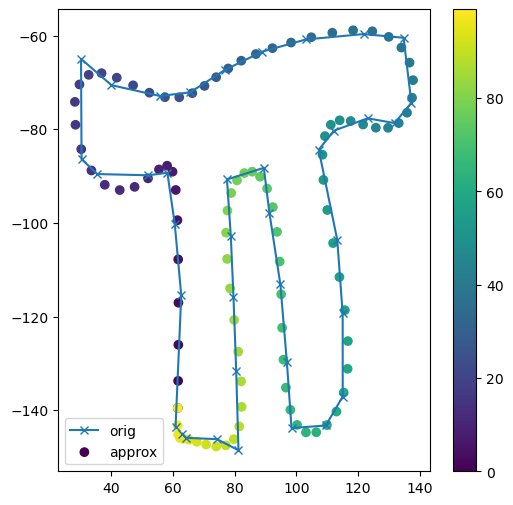

In [70]:
plt.figure(figsize=(6,6))
plt.plot(fig_pi[:,0],fig_pi[:,1],'x-',label='orig')
plt.scatter(reconstructed_pi.real,reconstructed_pi.imag,label='approx',c=range(100))
plt.legend()
plt.colorbar()
plt.show()

## short note on making shapes
We will use inkscape program. Draw a shape in inkscape. Save the file as svg, for example 'pi.svg'. From this file, we will extract the path.

Run the following command  in a terminal:

`grep -v 'inkscape' pi.svg | grep -e cx -e cy  | sed -e 's/"//g' -e 's/cx=//g' -e 's/cy=//g' -e 's/\/>//g' > pi.dat`

Now check to make sure the final output file `pi.dat` has only numbers and no text! If it has, then manually delete the text.

In the Jupyter notebook run the following commands:
`curve_pi = loadtxt('pi.dat') # command to load the data`
and then
`curve_pi = curve_pi.reshape((shape(curve_pi)[0]/2,2))`


In [ ]:
curve_pi = loadtxt('/tmp/pi.dat')

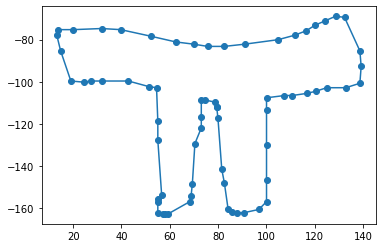

In [ ]:
x_pi = curve_pi[1::4]
y_pi = -curve_pi[::4]
plot(x_pi,y_pi,'-o')